### Student Information
Name: 謝諶煜

Student ID: 114065504

GitHub ID: OwenHsieh26274

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-Idata features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-Idata value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### Data Prerpocessing

In [20]:
### Begin Assignment Here
import pandas as pd
import numpy as np

df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
print("Entries: ", len(df))
df.head()

Entries:  847


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [21]:
df['type'].value_counts()

type
comment    783
post        64
Name: count, dtype: int64

In [22]:
df['subreddit'].value_counts()

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64

In [23]:
df['title'].value_counts()

title
Weekend Discussion Thread for the Weekend of April 11, 2025                                                                               51
r/Stocks Daily Discussion & Fundamentals Friday Apr 11, 2025                                                                              50
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?    46
Data Shows US Allies—Not China—Dumping Treasuries                                                                                         44
It's fucking awful seeing the "Silver" misinformation campaign everywhere I look                                                          41
                                                                                                                                          ..
Commitment of Trader Report for the Week                                                                                                   1
Underva

In [24]:
import helpers.data_mining_helpers as dmh
print("Entries: ", len(df))
df.isnull().apply(lambda x: dmh.check_missing_values(x))

# 783 missing values in downvotes and upvote_ration are the same as the number of 'comment' type entries, so likely only entries with type 'post' have downvotes and upvote_ration values

Entries:  847


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [25]:
print(df[df['downvotes'].notna() & df['upvote_ratio'].notna()][['type', 'downvotes', 'upvote_ratio']].value_counts())
df[df['downvotes'].notna() & df['upvote_ratio'].notna()][['type', 'downvotes', 'upvote_ratio']]

# As expected, only 'post' type entries have downvotes and upvote_ratio
# so missing values of 'comment' type entries aren't really missing, they don't even exist in the first place

type  downvotes  upvote_ratio
post  0.0        1.00            52
                 0.91             3
                 0.50             1
                 0.92             1
                 0.93             1
                 0.98             1
                 0.99             1
      1.0        0.84             1
                 0.98             1
      4.0        0.95             1
      11.0       0.99             1
Name: count, dtype: int64


,type,downvotes,upvote_ratio
3,post,0.0,0.98
48,post,0.0,1.00
63,post,4.0,0.95
70,post,0.0,1.00
72,post,0.0,1.00
...,...,...,...
783,post,0.0,1.00
786,post,0.0,1.00
802,post,0.0,1.00
836,post,0.0,1.00


In [26]:
df[['upvotes', 'downvotes', 'upvote_ratio']].agg(['min', 'max'])

# downvotes and upvote_ratio are within expected ranges, but upvotes has a negative minimum value which is unexpected

,upvotes,downvotes,upvote_ratio
min,-74,0.0,0.5
max,3943,11.0,1.0


In [27]:
print("Entries with negative upvotes:", len(df[df['upvotes'] < 0][['type','upvotes', 'downvotes', 'upvote_ratio']]))
df[df['upvotes'] < 0][['type','upvotes', 'downvotes', 'upvote_ratio']]

Entries with negative upvotes: 21


,type,upvotes,downvotes,upvote_ratio
1,comment,-15,NaN,NaN
7,comment,-3,NaN,NaN
56,comment,-1,NaN,NaN
58,comment,-1,NaN,NaN
64,comment,-1,NaN,NaN
120,comment,-25,NaN,NaN
244,comment,-14,NaN,NaN
309,comment,-1,NaN,NaN
385,comment,-11,NaN,NaN
399,comment,-19,NaN,NaN


In [28]:
df.loc[df['type'] == 'comment', 'upvotes'] = np.nan
df.isnull().apply(lambda x: dmh.check_missing_values(x))

# Filled in upvotes of 'comment' type entries with NaN since they don't really have upvotes in the first place

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,783,783,783,0,0,0,0,0,0


In [29]:
len(df.loc[df['upvotes'].notna(), ['upvotes', 'downvotes', 'upvote_ratio']])

64

In [30]:
# Adjust downvotes based on upvotes and upvote_ratio
mask = df['upvote_ratio'].notna()
df.loc[mask, 'downvotes'] = (
    df.loc[mask, 'upvotes'] * (1 - df.loc[mask, 'upvote_ratio']) / df.loc[mask, 'upvote_ratio']
).round()

# add total_votes column
df['total_votes'] = df['upvotes'] + df['downvotes']

df

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,total_votes
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,NaN,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,NaN
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,NaN,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,NaN
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,NaN,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,NaN
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30.0,1.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,31.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,NaN,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,NaN,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0,NaN
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,NaN,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0,NaN
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1.0,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0,1.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,NaN,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0,NaN


In [31]:
# drop label column since it's not needed for analysis, we only need sentiment column
df_cleaned = df.drop(columns=['label'])

# create new date column to replace datetime column for easier analysis
df_cleaned['date'] = pd.to_datetime(df_cleaned['datetime']).dt.date
df_cleaned = df_cleaned.drop(columns=['datetime'])

# drop columns that won't be used for analysis
df_cleaned = df_cleaned.drop(columns=['post_id', 'author', 'url'])

# drop upvotes and downvotes columns since we have total_votes and upvote_ratio now
df_cleaned = df_cleaned.drop(columns=['upvotes', 'downvotes'])

df_cleaned.head()

,type,subreddit,title,upvote_ratio,text,subjectivity,polarity,sentiment,entities,total_votes,date
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],NaN,2025-04-11
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",NaN,2025-04-12
2,comment,StockMarket,How do you feel about a sitting president maki...,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],NaN,2025-04-10
3,post,stockstobuytoday,Who knows more? $VMAR,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",31.0,2023-08-30
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],NaN,2025-04-11


In [32]:
post_counts = (
    df_cleaned.groupby('title')['type']
      .apply(lambda x: (x == 'post').sum())
      .reset_index(name='post_count')
)

multi_post_titles = post_counts[post_counts['post_count'] > 1]

print("Titles with no posts:", len(post_counts[post_counts['post_count'] == 0]))
print(multi_post_titles[['title', 'post_count']])

# See how many titles have no 'post' type entries
# And how many titles have multiple 'post' type entries

Titles with no posts: 85
                                      title  post_count
23                  Analyst Recommendations           3
41              Commitment of Trader Report           2
43                Crypto Gainers - Coinbase           5
46                           Dark Pool Data           4
53                  FINRA Daily Shorts Data           4
55                           Futures Market           4
58                        Gappers (Up/Down)           3
94                  Stock Gainers for Today           2
101  Threshold Securities -aka Naked Shorts           2
120                           World Markets           3


In [33]:
df_cleaned.duplicated().sum()

np.int64(1)

In [34]:
df_cleaned[df_cleaned.duplicated(subset=['text'], keep=False)].sort_values('title') # check for duplicate text entries

,type,subreddit,title,upvote_ratio,text,subjectivity,polarity,sentiment,entities,total_votes,date
844,post,stockstobuytoday,Analyst Recommendations,1.0,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.0000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",1.0,2025-03-24
786,post,stockstobuytoday,Analyst Recommendations,1.0,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.0000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",1.0,2025-04-03
409,post,stockstobuytoday,Analyst Recommendations,1.0,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.0000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",1.0,2025-03-25
438,post,stockstobuytoday,Commitment of Trader Report,1.0,"Summarized with Highlights, updated weekly be ...",0.000000,0.0000,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",1.0,2025-03-25
192,post,stockstobuytoday,Commitment of Trader Report,1.0,"Summarized with Highlights, updated weekly be ...",0.000000,0.0000,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",1.0,2025-03-21
717,post,stockstobuytoday,Crypto Gainers - Coinbase,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.000000,0.0000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",1.0,2025-03-26
679,post,stockstobuytoday,Crypto Gainers - Coinbase,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.000000,0.0000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",1.0,2025-03-29
595,post,stockstobuytoday,Crypto Gainers - Coinbase,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.000000,0.0000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",1.0,2025-03-31
284,post,stockstobuytoday,Crypto Gainers - Coinbase,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.000000,0.0000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",1.0,2025-04-06
432,post,stockstobuytoday,Crypto Gainers - Coinbase,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.000000,0.0000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",1.0,2025-04-11


In [35]:
# Remove duplicate text entries, keeping the earliest one based on date
df_cleaned = df_cleaned.sort_values('date').drop_duplicates(subset=['text'], keep='first')
print(len(df_cleaned[df_cleaned.duplicated(subset=['text'], keep=False)]))

0


In [36]:
post_counts = (
    df_cleaned.groupby('title')['type']
      .apply(lambda x: (x == 'post').sum())
      .reset_index(name='post_count')
)

multi_post_titles = post_counts[post_counts['post_count'] > 1]

# Although a small portion of titles have no 'post' type entries, therefore can not be analyzed with total_votes and upvote_ratio.
# But since they are a small portion, we can still keep upvote_ratio and total_votes for analysis of the rest of the data
print("Titles with no posts:", len(post_counts[post_counts['post_count'] == 0]))

# No titles have multiple 'post' type entries now, duplicates removed successfully
print(multi_post_titles[['title', 'post_count']])

Titles with no posts: 85
Empty DataFrame
Columns: [title, post_count]
Index: []


In [37]:
df_cleaned = df_cleaned.reset_index(drop=True) # resest index after cleaning
df_cleaned

,type,subreddit,title,upvote_ratio,text,subjectivity,polarity,sentiment,entities,total_votes,date
0,comment,stockstobuytoday,r/stockstobuytoday Lounge,NaN,DOGE is going up today 153%,0.000000,0.000000,0.0,"['today', '%', 'DOGE']",NaN,2021-01-28
1,comment,stockstobuytoday,r/stockstobuytoday Lounge,NaN,I feel like that’s gonna tank soon though,0.000000,0.000000,0.0,"['tank', '’']",NaN,2021-01-28
2,comment,stockstobuytoday,"Stocks with high Short Float. $AAL, $CLVS, $SD...",NaN,awesome,1.000000,1.000000,1.0,['awesome'],NaN,2021-01-31
3,comment,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,SLV =/= physical silver,0.571429,-0.375000,-1.0,"['=/=', 'SLV', 'silver']",NaN,2021-02-01
4,comment,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,So they went from saying redditors are bad for...,0.666667,-0.700000,-1.0,"['market', 'silver']",NaN,2021-02-01
...,...,...,...,...,...,...,...,...,...,...,...
819,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,NaN,So you only see white chicks at Target even th...,0.283333,-0.075000,-1.0,"['shit', 'logic', 't', 'Target', '’', '”']",NaN,2025-04-12
820,comment,wallstreetbets,Someone post the hotline please.,NaN,200k loss in a month.. haha,0.300000,0.200000,1.0,"['..', 'month', 'loss', 'haha']",NaN,2025-04-12
821,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,NaN,what do you expect? it sells toilet papers.......,0.000000,-0.052083,-1.0,"['toilet', 'margin', 'emote|t5_2th52|4271', 'i...",NaN,2025-04-12
822,comment,wallstreetbets,Someone post the hotline please.,NaN,My personal favorite part of the graph is that...,0.341667,0.125000,1.0,"['part', 'spike', 'graph', 'nothing']",NaN,2025-04-12


### Exercise 1

In [38]:
# Exercise 1
for i in range(3):
    print("Example", i+1)
    print("Title:", df_cleaned['title'][i])
    print("Text:", df_cleaned['text'][i])
    print()

Example 1
Title: r/stockstobuytoday Lounge
Text: DOGE is going up today 153%

Example 2
Title: r/stockstobuytoday Lounge
Text: I feel like that’s gonna tank soon though

Example 3
Title: Stocks with high Short Float. $AAL, $CLVS, $SDC, $SKT, $ATUS, $NKLA - data inside
Text: awesome



### Exercise 2

In [39]:
# Exercise 2
df_cleaned.iloc[:10, [4, 5, 6]]

,text,subjectivity,polarity
0,DOGE is going up today 153%,0.000000,0.000
1,I feel like that’s gonna tank soon though,0.000000,0.000
2,awesome,1.000000,1.000
3,SLV =/= physical silver,0.571429,-0.375
4,So they went from saying redditors are bad for...,0.666667,-0.700
5,Bought into SLV futures & lost 15 cents. It’s ...,0.125000,0.000
6,I work in finance writing (sort of) and it’s i...,0.590000,-0.340
7,"#Remember guys, the media is the #1 enemy of t...",0.000000,0.000
8,You know who happens to make money on silver r...,0.000000,0.000
9,Etrade has a feed of news articles about how r...,0.000000,0.000


### Exercise 3

In [40]:
# Exercise 3
df_cleaned[df_cleaned['subreddit'] == 'wallstreetbets'][::10][:5]

,type,subreddit,title,upvote_ratio,text,subjectivity,polarity,sentiment,entities,total_votes,date
300,comment,wallstreetbets,I would have rather lost money than feel this ...,NaN,Especially C.R.E.A.M.,1.000000,0.000000,0.0,['C.R.E.A.M'],NaN,2025-04-11
358,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,NaN,Sometimes I buy onlyfans of girls I went to hi...,0.714444,0.330000,1.0,['school'],NaN,2025-04-11
416,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,NaN,Peasant dont even know fartcoin is up 89% thi...,0.000000,0.000000,0.0,"['month', 'Peasant', '%', 'fartcoin', 'week']",NaN,2025-04-11
482,comment,wallstreetbets,I would have rather lost money than feel this ...,NaN,So sayeth the Market Makers,0.000000,0.000000,0.0,['Market'],NaN,2025-04-11
522,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,NaN,Short America right now,0.417857,0.142857,1.0,"['America', 'Short']",NaN,2025-04-11


### Exercise 4

In [41]:
# Exercise 4
import helpers.data_mining_helpers as dmh

# 'comment' type entries have NaN for upvotes, and upvote_ratio, which is expected
df_cleaned.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 2)
4      (The amoung of missing records is: , 2)
                        ...                   
819    (The amoung of missing records is: , 2)
820    (The amoung of missing records is: , 2)
821    (The amoung of missing records is: , 2)
822    (The amoung of missing records is: , 2)
823    (The amoung of missing records is: , 2)
Length: 824, dtype: object

### Exercise 5 (Skipped)

### Exercise 6 (Skipped)

### Exercise 7 (Skipped)

### Exercise 8


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

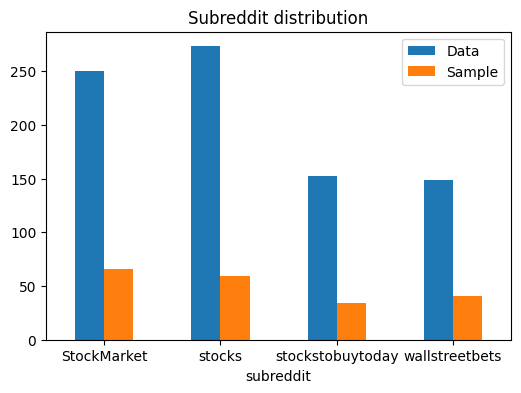

In [42]:
# Exercise 8
import matplotlib.pyplot as plt
%matplotlib inline

df_sample = df_cleaned.sample(n=200)

comparison_df = pd.DataFrame({
    'Data': df_cleaned.subreddit.value_counts(),
    'Sample': df_sample.subreddit.value_counts()
})

comparison_df.plot(kind='bar',
                   title='Subreddit distribution',
                   rot=0, fontsize=10, figsize=(6, 4))

### Exercise 9

In [43]:

# Exercise 9
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(df_cleaned.text[0])

['doge', 'is', 'going', 'up', 'today', '153']

### Exercise 10

In [44]:
# Exercise 10
df_counts = count_vect.fit_transform(df_cleaned.text)

df_counts.shape

(824, 4346)

In [45]:
# only contains a single '1' in the first record
df_counts[0:5, 0:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [46]:
target_arr = df_counts[0:5, 0:100].toarray()[0] # target the first record
target_idx = np.flatnonzero(target_arr)[0]  # get the index of first non-zero element
count_vect.get_feature_names_out()[target_idx]

'153'

### Exercise 11

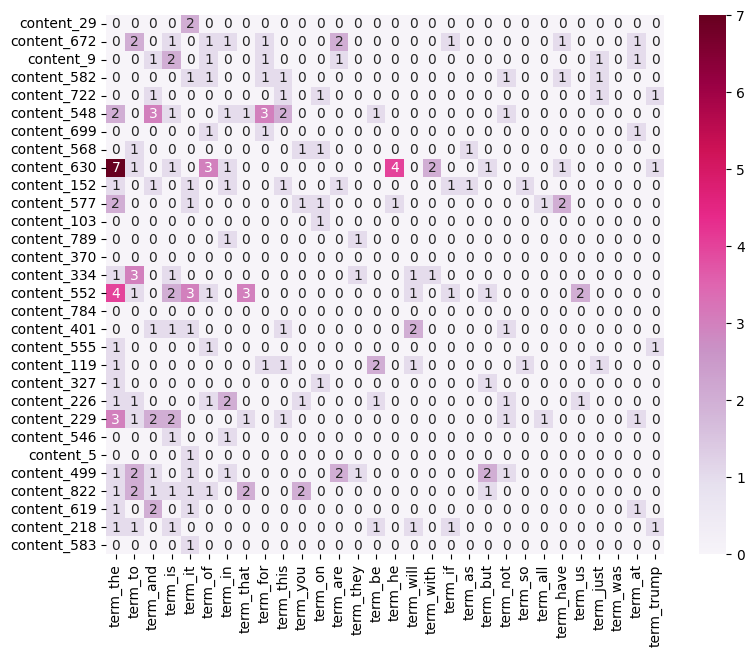

In [47]:
# Exercise 11
import seaborn as sns

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

sampled_terms = np.argsort(term_frequencies)[::-1][:30]
sampled_content = np.random.choice(df_counts.shape[0], 30, replace=False)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[sampled_terms]]
plot_y = ["content_" + str(i) for i in list(df_cleaned.index[sampled_content])]
plot_z = df_counts[sampled_content, :][:, sampled_terms].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=df_todraw.values.max(), annot=True)

### Exercise 12

In [48]:
# Exercise 12
import plotly.express as px

df_data = pd.DataFrame({
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

fig = px.bar(
    df_data,
    x='Terms',
    y='Frequency',
)

fig.show()

### Exercise 13 (Skipped)

### Exercise 14

In [49]:
# Exercise 14
df_data = pd.DataFrame({
    'Terms': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

df_data = df_data.sort_values(by='Frequency', ascending=False).head(300)

fig = px.bar(
    df_data,
    x='Terms',
    y='Frequency',
)

fig.show()

### Exercise 15

In [50]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

df_data = pd.DataFrame({
    'Terms': count_vect.get_feature_names_out(),
    'Frequency_log': term_frequencies_log
})

df_data = df_data.sort_values(by='Frequency_log', ascending=False).head(300)

fig = px.bar(
    df_data,
    x='Terms',
    y='Frequency_log',
)

fig.show()

# Skip insights

### New Data Visualizations

In [51]:
df_cleaned

,type,subreddit,title,upvote_ratio,text,subjectivity,polarity,sentiment,entities,total_votes,date
0,comment,stockstobuytoday,r/stockstobuytoday Lounge,NaN,DOGE is going up today 153%,0.000000,0.000000,0.0,"['today', '%', 'DOGE']",NaN,2021-01-28
1,comment,stockstobuytoday,r/stockstobuytoday Lounge,NaN,I feel like that’s gonna tank soon though,0.000000,0.000000,0.0,"['tank', '’']",NaN,2021-01-28
2,comment,stockstobuytoday,"Stocks with high Short Float. $AAL, $CLVS, $SD...",NaN,awesome,1.000000,1.000000,1.0,['awesome'],NaN,2021-01-31
3,comment,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,SLV =/= physical silver,0.571429,-0.375000,-1.0,"['=/=', 'SLV', 'silver']",NaN,2021-02-01
4,comment,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,So they went from saying redditors are bad for...,0.666667,-0.700000,-1.0,"['market', 'silver']",NaN,2021-02-01
...,...,...,...,...,...,...,...,...,...,...,...
819,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,NaN,So you only see white chicks at Target even th...,0.283333,-0.075000,-1.0,"['shit', 'logic', 't', 'Target', '’', '”']",NaN,2025-04-12
820,comment,wallstreetbets,Someone post the hotline please.,NaN,200k loss in a month.. haha,0.300000,0.200000,1.0,"['..', 'month', 'loss', 'haha']",NaN,2025-04-12
821,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,NaN,what do you expect? it sells toilet papers.......,0.000000,-0.052083,-1.0,"['toilet', 'margin', 'emote|t5_2th52|4271', 'i...",NaN,2025-04-12
822,comment,wallstreetbets,Someone post the hotline please.,NaN,My personal favorite part of the graph is that...,0.341667,0.125000,1.0,"['part', 'spike', 'graph', 'nothing']",NaN,2025-04-12


##### 1. Correlation between Subjectivity, Polarity and Sentiment

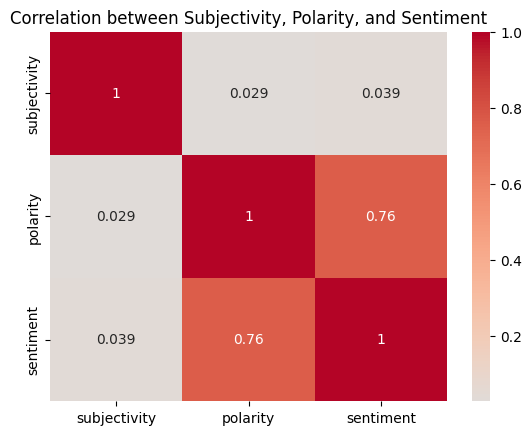

'From the plot we can see that polarity is highly correlated with sentiment'

In [52]:
sns.heatmap(df_cleaned[['subjectivity', 'polarity', 'sentiment']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between Subjectivity, Polarity, and Sentiment")
plt.show()
"""From the plot we can see that polarity is highly correlated with sentiment"""

##### 2. Daily Sentiment with 7-Day Rolling Average

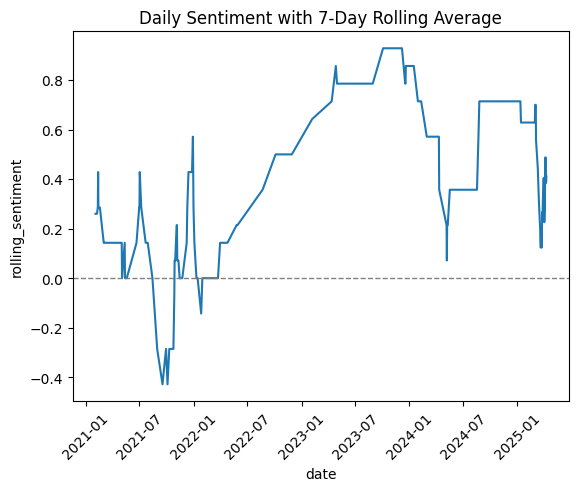

'From the plot, we can observe a noticeable decline in sentiment between 2021-07 and 2022-01, followed by a steady upward trend starting around 2022-07'

In [53]:
daily_sentiment = df_cleaned.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment['rolling_sentiment'] = daily_sentiment['sentiment'].rolling(7, center=True).mean()

sns.lineplot(data=daily_sentiment, x='date', y='rolling_sentiment')
plt.title("Daily Sentiment with 7-Day Rolling Average")
plt.axhline(0, color='gray', ls='--', lw=1)
plt.xticks(rotation=45)
plt.show()
"""From the plot, we can observe a noticeable decline in sentiment between 2021-07 and 2022-01, followed by a steady upward trend starting around 2022-07"""

# Phase 2

### Data Preprocessing

In [26]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
print("Entries: ", len(data))
data.head()

Entries:  847


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [27]:
# we only need text content to predict "subreddit", so "title" and "text" will be helpful. 
data['content'] = data['title'] + ' ' + data['text']

# drop unnecessary columns, column "entites" are just words retrieved from "text" os it can be dropped
data = data[['subreddit', 'content']]

data

,subreddit,content
0,wallstreetbets,Retardation is on the menu boys! WSB is so bac...
1,wallstreetbets,Retail giant TARGET has now declined for 10 co...
2,StockMarket,How do you feel about a sitting president maki...
3,stockstobuytoday,Who knows more? $VMAR Vision Marine Technologi...
4,StockMarket,The Trump administration is begging Xi Jinping...
...,...,...
842,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...
843,StockMarket,$ U.S. dollar value (crashing) Where can I rea...
844,stockstobuytoday,"Analyst Recommendations Upgrades, Downgrades\r..."
845,wallstreetbets,Weekend Discussion Thread for the Weekend of A...


In [28]:
# Check NaN and unique subreddit
print(data['content'].isna().sum())
print(data['subreddit'].isna().sum())
print(data['subreddit'].unique())

0
0
['wallstreetbets' 'StockMarket' 'stockstobuytoday' 'stocks']


In [29]:
# Generate Term-Document Frequency
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

categories = data['subreddit'].unique()
category_dfs = {}

for category in categories:
    category_dfs[category] = data[data['subreddit'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()
    df_counts = count_vect.fit_transform(df['content'])
    
    words = count_vect.get_feature_names_out()
    
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

filt_term_document_dfs = {}

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

category_number=0

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category wallstreetbets:


,10,100,1000,10k,11,12,14,16,17th,18,...,year,years,yesterday,yet,yippee,you,your,yourself,ytd,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
146,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


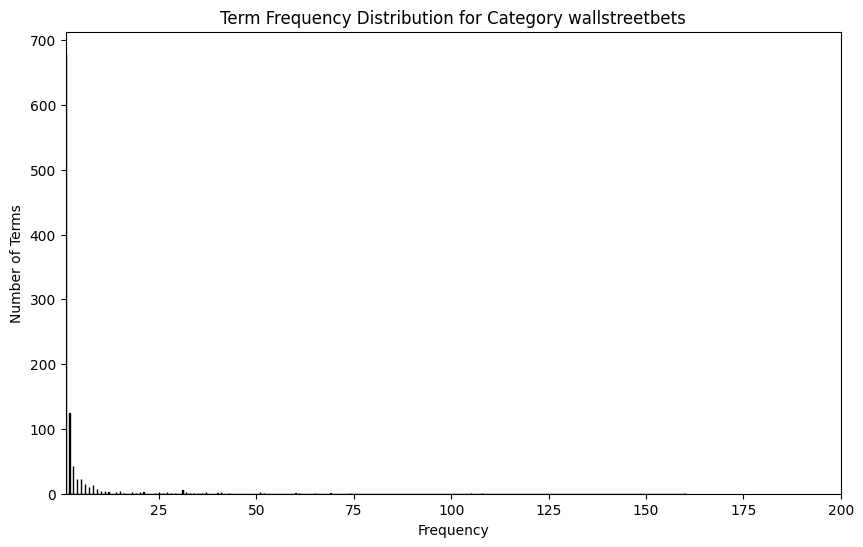

In [30]:
# Show Freq Distribution
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [31]:
# Filter Data

category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category wallstreetbets we filter the following words:
Bottom 1.0% words: 
wutang      1
100         1
1000        1
10k         1
onto        1
12          1
onlyfans    1
ones        1
17th        1
once        1
dtype: int64
Top 5.0% words: 
just            15
like            16
t5_2th52        18
img             18
emote           18
at              19
retardation     20
menu            20
boys            20
my              21
that            21
wsb             24
they            25
back            25
this            26
post            27
please          27
hotline         27
you             28
someone         29
history         31
declined        31
longest         31
streak          31
retail          31
giant           31
consecutive     32
losing          32
weeks           33
its             34
has             35
10              36
and             37
so              37
on              40
now             41
target          41
it              43
2025            51
discussio

,14,16,18,186,18630,1934,1981,1m,20,200k,...,xi,year,years,yesterday,yet,yippee,your,yourself,ytd,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Creaete item csv by category

from PAMI.extras.convert.DF2DB import DF2DB
import io
import builtins

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [33]:
# Generate Frequen Patterns
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_StockMarket.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_StockMarket= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_StockMarket))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 58
Runtime: 0.0030906200408935547


In [34]:
obj1 = alg.FPGrowth(iFile='td_freq_db_stocks.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_stocks= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stocks))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 323
Runtime: 0.021516799926757812


In [35]:
obj1 = alg.FPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_stockstobuytoday= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4
Runtime: 0.018825769424438477


In [36]:
obj1 = alg.FPGrowth(iFile='td_freq_db_wallstreetbets.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_wallstreetbets= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_wallstreetbets))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 15
Runtime: 0.011775970458984375


In [37]:
# Discard similiar patterns

import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_StockMarket, frequentPatternsDF_stocks, frequentPatternsDF_stockstobuytoday, frequentPatternsDF_wallstreetbets]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

              Patterns  Support
41                 sun       25
39               bunch       24
33   surrounded\tbunch       23
28         launch\tsun       23
29       launch\tbunch       23
..                 ...      ...
49             country        9
356               puts        9
2                 than        9
1                  why        9
0                 from        9

[364 rows x 2 columns]
Number of patterns discarded: 36


In [39]:
# Gererate TDM

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'content' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
data_tdm = count_vect.fit_transform(data['content']) 
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
data['tokenized_text'] = data['content'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(data_tdm.toarray(), columns=terms, index=data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,04,06,08,10,...,seems,still,will,dollar\ttreasuries,reason,country,puts,than,why,from
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Exercise 16 (Skipped)

### Exercise 17 (Skipped)

### Exerise 18

c:\Users\sky26\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


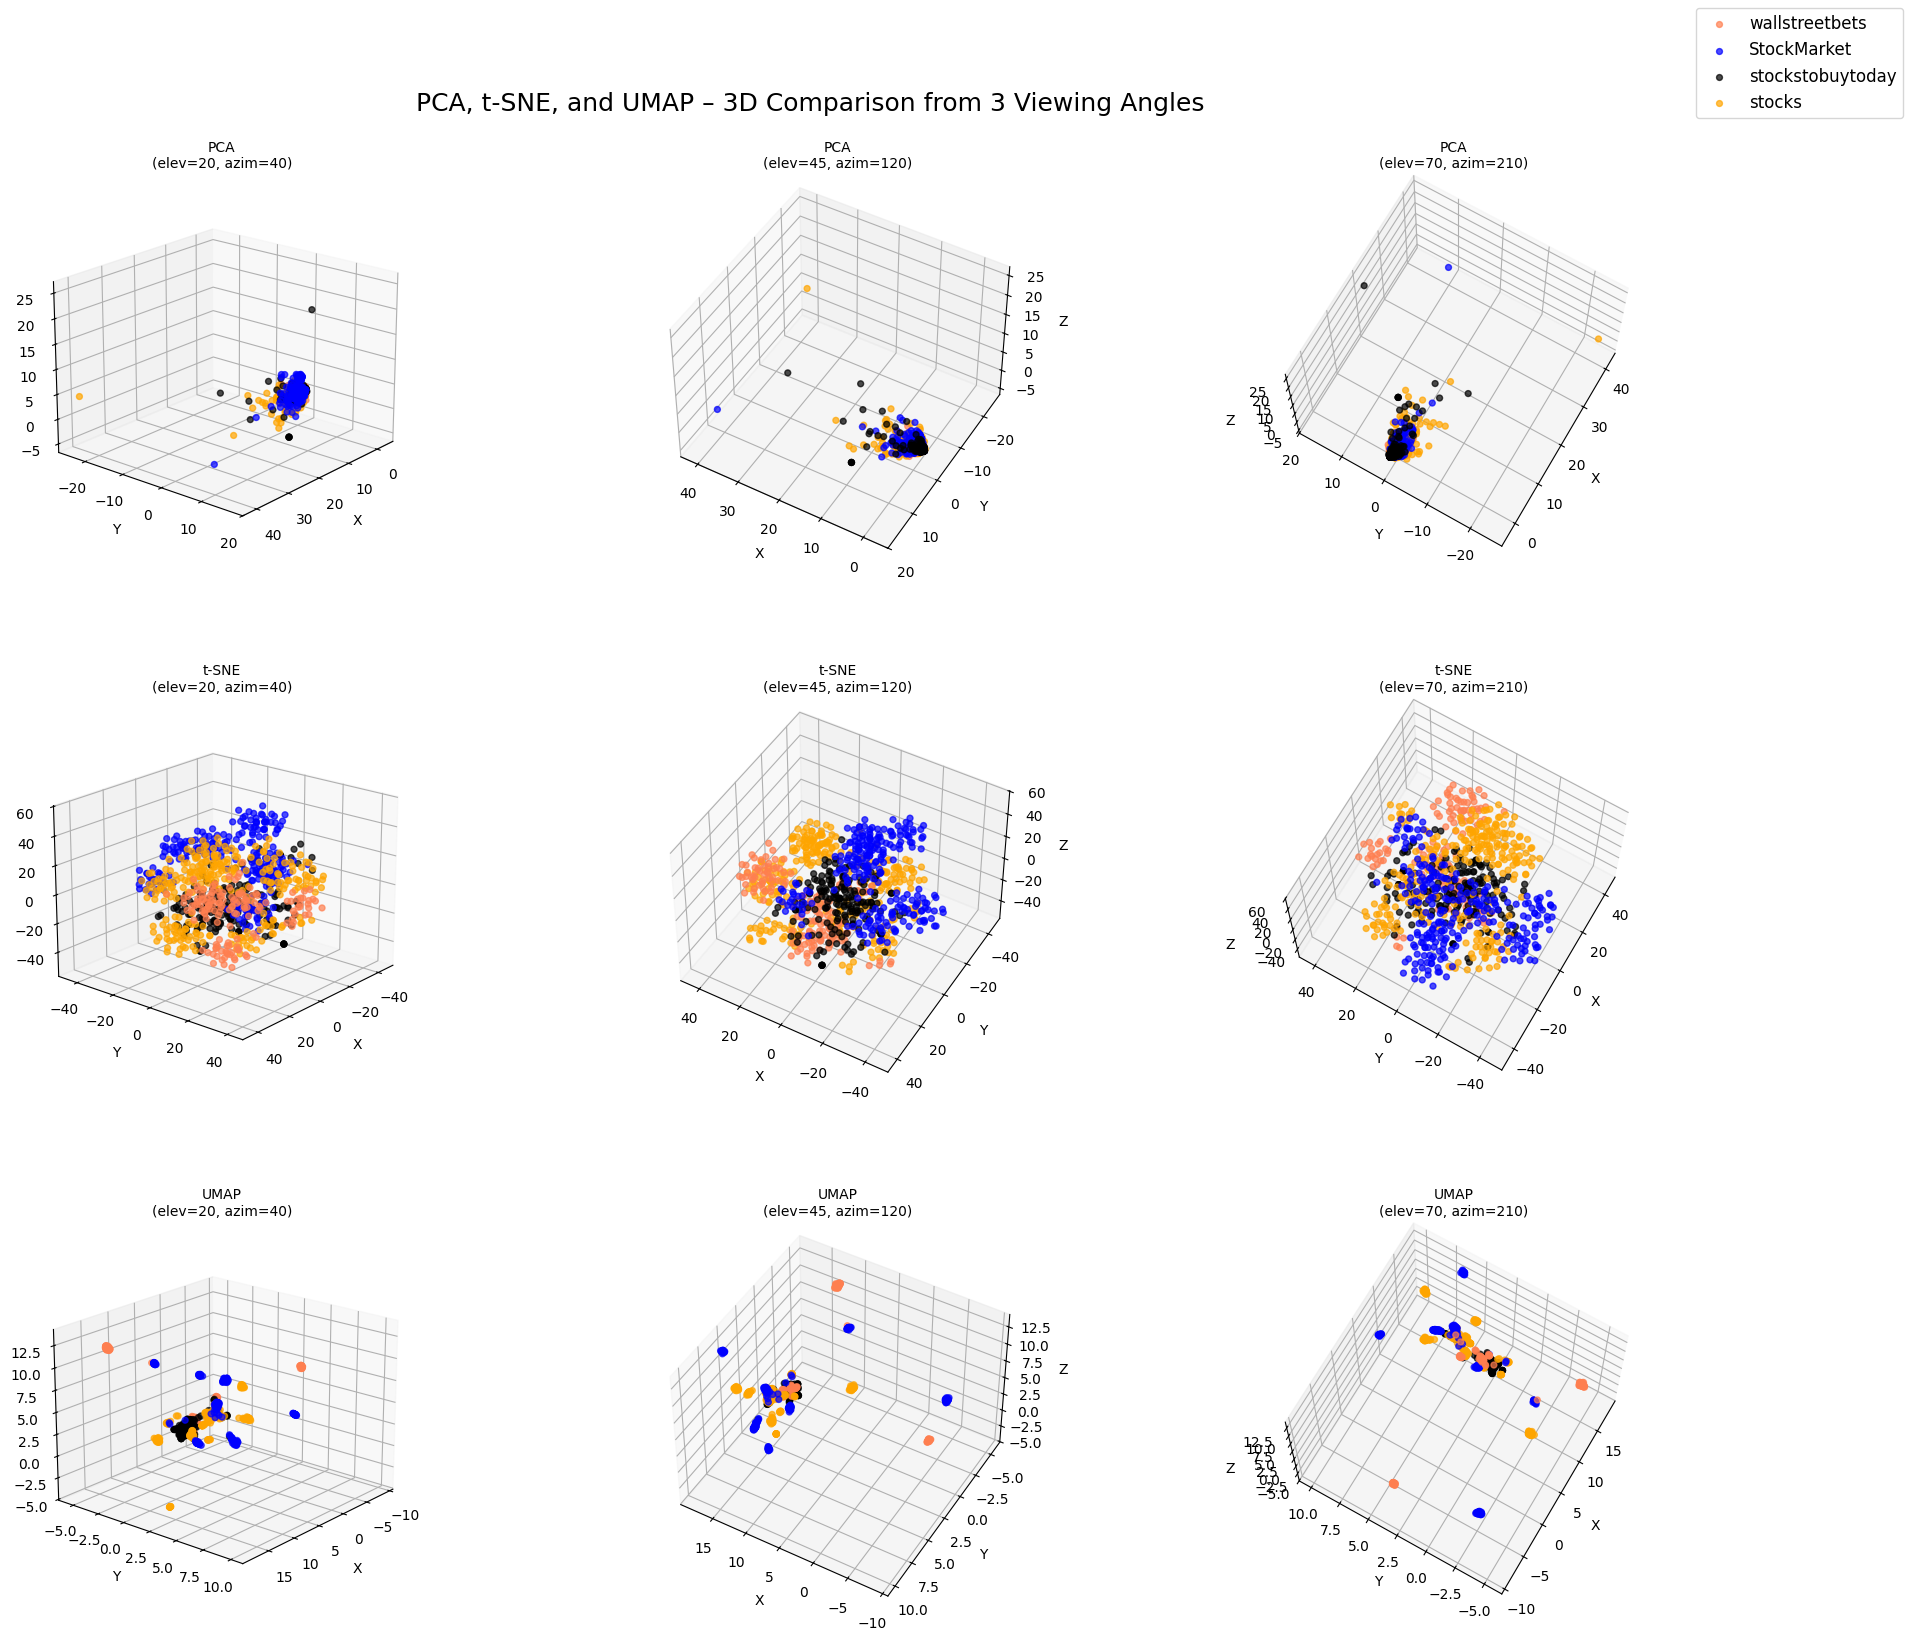

In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X_pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = data['subreddit'].unique()

angles = [(20, 40), (45, 120), (70, 210)]

def plot_scatter_3d(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[data['subreddit'] == category, 0]
        ys = X_reduced[data['subreddit'] == category, 1]
        zs = X_reduced[data['subreddit'] == category, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, s=18, alpha=0.7)
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"{title}\n(elev={elev}, azim={azim})",
                 fontsize=10, pad=10) 
    ax.set_xlabel("X", labelpad=5)
    ax.set_ylabel("Y", labelpad=5)
    ax.set_zlabel("Z", labelpad=5)

fig = plt.figure(figsize=(22, 18))
fig.suptitle("PCA, t-SNE, and UMAP – 3D Comparison from 3 Viewing Angles",
             fontsize=18, y=0.95)

datasets = [
    ("PCA", X_pca_3d),
    ("t-SNE", X_tsne_3d),
    ("UMAP", X_umap_3d),
]

for i, (method, dt) in enumerate(datasets):
    for j, (elev, azim) in enumerate(angles):
        ax = fig.add_subplot(3, 3, i * 3 + j + 1, projection="3d")
        plot_scatter_3d(ax, dt, method, elev, azim)

plt.subplots_adjust(
    top=0.90,   
    wspace=0.3, 
    hspace=0.4  
)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=12)

plt.show()

### Exrecise 19

In [42]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()

mlb.fit(data.subreddit)
data['bin_subreddit'] = mlb.transform(data['subreddit']).tolist()

data[0:9]

,subreddit,content,tokenized_text,bin_subreddit
0,wallstreetbets,Retardation is on the menu boys! WSB is so bac...,"{the, so, Calls, Retardation, is, back, boys!,...","[0, 0, 0, 1]"
1,wallstreetbets,Retail giant TARGET has now declined for 10 co...,"{consecutive, deal, streak, like, in, about, m...","[0, 0, 0, 1]"
2,StockMarket,How do you feel about a sitting president maki...,"{policy, own, and, of, do, Seeing, about, in, ...","[1, 0, 0, 0]"
3,stockstobuytoday,Who knows more? $VMAR Vision Marine Technologi...,"{Torrente's, and, astonishing, about, –, recor...","[0, 0, 1, 0]"
4,StockMarket,The Trump administration is begging Xi Jinping...,"{quickly., begging, you., didn’t, is, to, Jinp...","[1, 0, 0, 0]"
5,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,"{puss, Hoping, of, in, wet, luck, 2025, wish, ...","[0, 0, 0, 1]"
6,stocks,Is the market in complete denial right now? Tr...,"{right, increasing, and, see, very, in, fire, ...","[0, 1, 0, 0]"
7,wallstreetbets,Retardation is on the menu boys! WSB is so bac...,"{mouth, so, we, Retardation, months,, of, boys...","[0, 0, 0, 1]"
8,stocks,"It's fucking awful seeing the ""Silver"" misinfo...","{Third, fucking, held, Follow, awful, misinfor...","[0, 1, 0, 0]"


### Exercise 20

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import binarize

document_to_transform_1 = [data.iloc[5]['content']]
document_to_transform_2 = [data.iloc[55]['content']]
document_to_transform_3 = [data.iloc[555]['content']]

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1_bin, document_vector_count_2_bin, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1_bin, document_vector_count_3_bin, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2_bin, document_vector_count_3_bin, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

Cosine Similarity using count bw 1 and 2: 0.162698
Cosine Similarity using count bw 1 and 3: 0.118585
Cosine Similarity using count bw 2 and 3: 0.085749


C:\Users\sky26\AppData\Local\Temp\ipykernel_17928\2408370704.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\sky26\AppData\Local\Temp\ipykernel_17928\2408370704.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\sky26\AppData\Local\Temp\ipykernel_17928\2408370704.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o

### Exercise 21

In [45]:
category_mapping = dict(data[['subreddit', 'bin_subreddit']].drop_duplicates().values)

target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train, X_test, y_train, y_test = train_test_split(augmented_df, data['subreddit'], test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

TypeError: unhashable type: 'list'